In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np

data=np.load('/content/drive/MyDrive/data1.npy')
target=np.load('/content/drive/MyDrive/target1.npy')

#loading the save numpy arrays in the previous code

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 98, 98, 200)       2000      
_________________________________________________________________
activation_2 (Activation)    (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_3 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 52900)            

In [8]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [9]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - ETA: 0s - loss: 0.6957 - accuracy: 0.5596WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model/assets
31/31 [==============================] - 2s 79ms/step - loss: 0.6957 - accuracy: 0.5596 - val_loss: 0.6070 - val_accuracy: 0.6694
Epoch 2/20
31/31 [==============================] - 2s 65ms/step - loss: 0.5511 - accuracy: 0.7101 - val_loss: 0.4817 - val_accuracy: 0.7460
Epoch 3/20
31/31 [==============================] - 2s 62ms/step - loss: 0.3420 - accuracy: 0.8495 - val_l

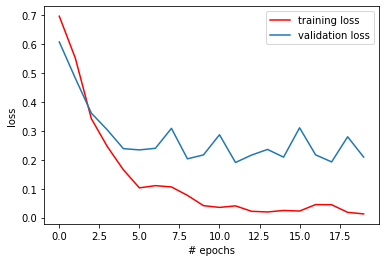

In [10]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

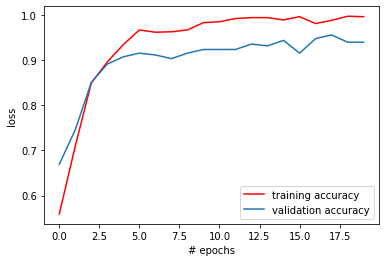

In [11]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 0s 29ms/step - loss: 0.1252 - accuracy: 0.9348
[0.12516379356384277, 0.9347826242446899]


In [13]:
from google.colab import files
files.download('/content/model-012.model')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>